In [634]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

## Setup School groups
### Using endowment quartile and student income level

In [635]:
school_data = pd.read_csv('https://raw.githubusercontent.com/he-chang/data5100project/main/AttemptUsingSchoolComparison/endowment_and_finaid_data.csv')

In [637]:
# Function to calculate the percentages
def calcPercentage(overall_total, group_total):
  if overall_total == 0:
    return 0
  else:
    return group_total / overall_total

In [638]:
income_groups = ['number_in_income_level1', 'number_in_income_level2', 'number_in_income_level3', 'number_in_income_level4', 'number_in_income_level5']

for group in income_groups:
  new_column_name = group + "_pct"
  school_data[new_column_name] = school_data.apply(lambda x: calcPercentage(x['number_in_all_levels'], x[group]), axis = 1)

In [639]:
def calculateRange(income_lvl1, income_lvl2, income_lvl3, income_lvl4, income_lvl5):
  income_list = [income_lvl1, income_lvl2, income_lvl3, income_lvl4, income_lvl5]
  income_max = max(income_list)
  income_min = min(income_list)
  return income_max - income_min

In [640]:
def calculateMax(income_lvl1, income_lvl2, income_lvl3, income_lvl4, income_lvl5):
  income_list = [income_lvl1, income_lvl2, income_lvl3, income_lvl4, income_lvl5]
  income_max = max(income_list)

  return income_list.index(income_max) + 1

In [641]:
school_data['income_range'] = school_data.apply(lambda x: calculateRange(x['number_in_income_level1_pct'], x['number_in_income_level2_pct'], x['number_in_income_level3_pct'], x['number_in_income_level4_pct'], x['number_in_income_level5_pct']), axis = 1)
school_data['income_level_max'] = school_data.apply(lambda x: calculateMax(x['number_in_income_level1_pct'], x['number_in_income_level2_pct'], x['number_in_income_level3_pct'], x['number_in_income_level4_pct'], x['number_in_income_level5_pct']), axis = 1)

In [642]:
df_public_endowment = school_data.dropna(subset=['public_endowment'])
df_private_endowment = school_data.dropna(subset=['private_endowment'])

In [643]:
# Separate the Public Schools with Endowments into percentile groups: [0% - 25%), [25% - 50%), [50% - 75%), [75% - 100%] 
public_Q1 = np.nanquantile(df_public_endowment['public_endowment'], 0.25)
public_Q2 = np.nanquantile(df_public_endowment['public_endowment'], 0.5)
public_Q3 = np.nanquantile(df_public_endowment['public_endowment'], 0.75)

public_range1 = df_public_endowment[df_public_endowment['public_endowment'] < public_Q1]
public_range2 = df_public_endowment[(df_public_endowment['public_endowment'] >= public_Q1) & (df_public_endowment['public_endowment'] < public_Q2)]
public_range3 = df_public_endowment[(df_public_endowment['public_endowment'] >= public_Q2) & (df_public_endowment['public_endowment'] < public_Q3)]
public_range4 = df_public_endowment[df_public_endowment['public_endowment'] >= public_Q3]

In [644]:
# Separate the Private Schools with Endowments into percentile groups: [0% - 25%), [25% - 50%), [50% - 75%), [75% - 100%] 
private_Q1 = np.nanquantile(df_private_endowment['private_endowment'], 0.25)
private_Q2 = np.nanquantile(df_private_endowment['private_endowment'], 0.5)
private_Q3 = np.nanquantile(df_private_endowment['private_endowment'], 0.75)

private_range1 = df_private_endowment[df_private_endowment['private_endowment'] < private_Q1]
private_range2 = df_private_endowment[(df_private_endowment['private_endowment'] >= private_Q1) & (df_private_endowment['private_endowment'] < private_Q2)]
private_range3 = df_private_endowment[(df_private_endowment['private_endowment'] >= private_Q2) & (df_private_endowment['private_endowment'] < private_Q3)]
private_range4 = df_private_endowment[df_private_endowment['private_endowment'] >= private_Q3]

In [647]:
# Separate Public school Endowment groups by student family income
# Chose schools where the range between income levels is less than 20%
# And the largest income group was greater than or equal to $75001, or the largest income group was less than or equal to $75000
group1A = public_range4[(public_range4['income_range'] < 0.2) & (public_range4['income_level_max'] >= 4)]
group2A = public_range4[(public_range4['income_range'] < 0.2) & (public_range4['income_level_max'] < 4)]
group3A = public_range3[(public_range3['income_range'] < 0.2) & (public_range3['income_level_max'] >= 4)]
group4A = public_range3[(public_range3['income_range'] < 0.2) & (public_range3['income_level_max'] < 4)]
group5A = public_range2[(public_range2['income_range'] < 0.2) & (public_range2['income_level_max'] >= 4)]
group6A = public_range2[(public_range2['income_range'] < 0.2) & (public_range2['income_level_max'] < 4)]
group7A = public_range1[(public_range1['income_range'] < 0.2) & (public_range1['income_level_max'] >= 4)]
group8A = public_range1[(public_range1['income_range'] < 0.2) & (public_range1['income_level_max'] < 4)]

In [648]:
df_all_schools = pd.read_csv('https://raw.githubusercontent.com/he-chang/data5100project/main/AttemptUsingSchoolComparison/student_data.csv')

In [649]:
df = df_all_schools[df_all_schools['institute_id'].isin(group1A['institute_id'])]

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 3 to 18860
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           974 non-null    int64  
 1   institute_id         974 non-null    int64  
 2   gr_total             974 non-null    float64
 3   gr_AmerInd_AlaskNtv  974 non-null    float64
 4   gr_Asian             974 non-null    float64
 5   gr_AfrAmer           974 non-null    float64
 6   gr_Hispanic          974 non-null    float64
 7   gr_Hi_PacIsland      974 non-null    float64
 8   gr_White             974 non-null    float64
 9   gr_2orMore           974 non-null    float64
 10  gr_unknown           974 non-null    float64
 11  gr_nonresAlien       974 non-null    float64
 12  year                 974 non-null    int64  
 13  co_total             974 non-null    float64
 14  co_AmerInd_AlaskNtv  974 non-null    float64
 15  co_Asian             974 non-null    f

In [651]:
df = df.dropna()

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 3 to 18860
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           963 non-null    int64  
 1   institute_id         963 non-null    int64  
 2   gr_total             963 non-null    float64
 3   gr_AmerInd_AlaskNtv  963 non-null    float64
 4   gr_Asian             963 non-null    float64
 5   gr_AfrAmer           963 non-null    float64
 6   gr_Hispanic          963 non-null    float64
 7   gr_Hi_PacIsland      963 non-null    float64
 8   gr_White             963 non-null    float64
 9   gr_2orMore           963 non-null    float64
 10  gr_unknown           963 non-null    float64
 11  gr_nonresAlien       963 non-null    float64
 12  year                 963 non-null    int64  
 13  co_total             963 non-null    float64
 14  co_AmerInd_AlaskNtv  963 non-null    float64
 15  co_Asian             963 non-null    f

## Calculate Percentages and difference between total graduation rate and BiPOC graduation rate

In [653]:
def getCohortGroupTotal(group_name):
  new_group_name = group_name
  return new_group_name.replace("gr", "co")

In [654]:
cohort_groups = ['co_AmerInd_AlaskNtv', 'co_AmerInd_AlaskNtv', 'co_AmerInd_AlaskNtv', 'co_Asian', 'co_AfrAmer', 'co_Hispanic', 'co_Hi_PacIsland', 'co_White', 'co_2orMore', 'co_unknown', 'co_nonresAlien']

for group in cohort_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['co_total'], x[group]), axis = 1)

df.head()

,Unnamed: 0,institute_id,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,e_nonresAlien,co_AmerInd_AlaskNtv_pct,co_Asian_pct,co_AfrAmer_pct,co_Hispanic_pct,co_Hi_PacIsland_pct,co_White_pct,co_2orMore_pct,co_unknown_pct,co_nonresAlien_pct
3,3,100706,367.0,10.0,13.0,50.0,6.0,0.0,264.0,7.0,...,450.0,0.019763,0.026350,0.139657,0.022398,0.0000,0.747036,0.014493,0.003953,0.026350
5,5,100751,2958.0,15.0,36.0,214.0,55.0,0.0,2623.0,0.0,...,1541.0,0.004507,0.011492,0.085174,0.017125,0.0000,0.876521,0.000000,0.000000,0.005183
7,7,100858,2829.0,20.0,43.0,242.0,68.0,0.0,2427.0,0.0,...,1186.0,0.007683,0.018727,0.114046,0.028812,0.0000,0.819688,0.000000,0.007203,0.003842
61,61,106397,1729.0,28.0,48.0,72.0,62.0,0.0,1471.0,21.0,...,1387.0,0.021203,0.027807,0.046229,0.036149,0.0000,0.841502,0.010080,0.004171,0.012861
91,91,110422,3081.0,24.0,367.0,26.0,300.0,14.0,2058.0,0.0,...,326.0,0.008373,0.125141,0.010862,0.115637,0.0043,0.647205,0.000000,0.084861,0.003621


In [655]:
grad_groups = ['gr_total', 'gr_AmerInd_AlaskNtv', 'gr_Asian', 'gr_AfrAmer', 'gr_Hispanic', 'gr_Hi_PacIsland', 'gr_White', 'gr_2orMore', 'gr_unknown', 'gr_nonresAlien']

for group in grad_groups:
  new_column_name = group + "_pct"
  total_group = getCohortGroupTotal(group)
  df[new_column_name] = df.apply(lambda x: calcPercentage(x[total_group], x[group]), axis = 1)

df.head()

,Unnamed: 0,institute_id,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,gr_total_pct,gr_AmerInd_AlaskNtv_pct,gr_Asian_pct,gr_AfrAmer_pct,gr_Hispanic_pct,gr_Hi_PacIsland_pct,gr_White_pct,gr_2orMore_pct,gr_unknown_pct,gr_nonresAlien_pct
3,3,100706,367.0,10.0,13.0,50.0,6.0,0.0,264.0,7.0,...,0.483531,0.666667,0.650000,0.471698,0.352941,0.000000,0.465608,0.636364,0.666667,0.750000
5,5,100751,2958.0,15.0,36.0,214.0,55.0,0.0,2623.0,0.0,...,0.666516,0.750000,0.705882,0.566138,0.723684,0.000000,0.674293,0.000000,0.000000,0.652174
7,7,100858,2829.0,20.0,43.0,242.0,68.0,0.0,2427.0,0.0,...,0.679232,0.625000,0.551282,0.509474,0.566667,0.000000,0.710896,0.000000,0.666667,0.562500
61,61,106397,1729.0,28.0,48.0,72.0,62.0,0.0,1471.0,21.0,...,0.600973,0.459016,0.600000,0.541353,0.596154,0.000000,0.607600,0.724138,0.250000,0.648649
91,91,110422,3081.0,24.0,367.0,26.0,300.0,14.0,2058.0,0.0,...,0.697217,0.648649,0.663653,0.541667,0.587084,0.736842,0.719580,0.000000,0.746667,0.750000


In [656]:
enr_groups = ['e_AmerInd_AlaskNtv', 'e_Asian', 'e_AfrAmer', 'e_Hispanic', 'e_Hi_PacIsland', 'e_White', 'e_2orMore', 'e_unknown', 'e_nonresAlien']

for group in enr_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['e_total'], x[group]), axis = 1)
  
df.head()

,Unnamed: 0,institute_id,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,gr_nonresAlien_pct,e_AmerInd_AlaskNtv_pct,e_Asian_pct,e_AfrAmer_pct,e_Hispanic_pct,e_Hi_PacIsland_pct,e_White_pct,e_2orMore_pct,e_unknown_pct,e_nonresAlien_pct
3,3,100706,367.0,10.0,13.0,50.0,6.0,0.0,264.0,7.0,...,0.750000,0.012744,0.037419,0.117001,0.030369,0.000136,0.693736,0.014507,0.033080,0.061009
5,5,100751,2958.0,15.0,36.0,214.0,55.0,0.0,2623.0,0.0,...,0.652174,0.004374,0.011683,0.114612,0.029955,0.001065,0.769970,0.019913,0.004086,0.044343
7,7,100858,2829.0,20.0,43.0,242.0,68.0,0.0,2427.0,0.0,...,0.562500,0.007119,0.022482,0.073520,0.023126,0.000000,0.812379,0.000000,0.013674,0.047699
61,61,106397,1729.0,28.0,48.0,72.0,62.0,0.0,1471.0,21.0,...,0.648649,0.012904,0.023361,0.050669,0.059469,0.000710,0.764571,0.029636,0.003946,0.054733
91,91,110422,3081.0,24.0,367.0,26.0,300.0,14.0,2058.0,0.0,...,0.750000,0.002284,0.111404,0.007512,0.147389,0.002639,0.595138,0.065472,0.051617,0.016546


In [657]:
hr_groups = ['hr_AmerInd_AlaskNtv', 'hr_Asian', 'hr_AfrAmer', 'hr_Hispanic', 'hr_Hi_PacIsland', 'hr_White', 'hr_2orMore', 'hr_unknown']

for group in hr_groups:
  new_column_name = group + "_pct"
  df[new_column_name] = df.apply(lambda x: calcPercentage(x['hr_total'], x[group]), axis = 1)

df.head()

,Unnamed: 0,institute_id,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,e_unknown_pct,e_nonresAlien_pct,hr_AmerInd_AlaskNtv_pct,hr_Asian_pct,hr_AfrAmer_pct,hr_Hispanic_pct,hr_Hi_PacIsland_pct,hr_White_pct,hr_2orMore_pct,hr_unknown_pct
3,3,100706,367.0,10.0,13.0,50.0,6.0,0.0,264.0,7.0,...,0.033080,0.061009,0.002101,0.100840,0.046218,0.016807,0.000000,0.794118,0.000000,0.014706
5,5,100751,2958.0,15.0,36.0,214.0,55.0,0.0,2623.0,0.0,...,0.004086,0.044343,0.000555,0.063298,0.063298,0.018323,0.000555,0.826763,0.002221,0.000000
7,7,100858,2829.0,20.0,43.0,242.0,68.0,0.0,2427.0,0.0,...,0.013674,0.047699,0.004402,0.097579,0.037417,0.025679,0.000000,0.807043,0.000000,0.006603
61,61,106397,1729.0,28.0,48.0,72.0,62.0,0.0,1471.0,21.0,...,0.003946,0.054733,0.006260,0.062598,0.033646,0.025822,0.000000,0.809859,0.010955,0.017214
91,91,110422,3081.0,24.0,367.0,26.0,300.0,14.0,2058.0,0.0,...,0.051617,0.016546,0.003653,0.068493,0.011872,0.061187,0.000913,0.787215,0.010046,0.040183


In [658]:
# Staff BiPOC percentage = all non-white race and ethnicities staff counts added together / total staff

df['hr_BiPOC_pct'] = ((df['hr_AmerInd_AlaskNtv'] + df['hr_Asian'] + df['hr_AfrAmer'] + df['hr_Hispanic'] + df['hr_Hi_PacIsland'] + df['hr_2orMore'])/df['hr_total'])

In [659]:
# Cohort BiPOC Percentage = all non-white race and ethnicities cohort counts added together / total cohort size

df['co_BiPOC_pct'] = ((df['co_AmerInd_AlaskNtv'] + df['co_Asian'] + df['co_AfrAmer'] + df['co_Hispanic'] + df['co_Hi_PacIsland'] + df['co_2orMore'])/df['co_total'])

In [660]:
# BiPOC Graduation Percentage = all non-white race and ethnicities graduation counts added together / all non-white race and ethnicity group cohort counts added together

df['gr_BiPOC_pct'] = ((df['gr_AmerInd_AlaskNtv'] + df['gr_Asian'] + df['gr_AfrAmer'] + df['gr_Hispanic'] + df['gr_Hi_PacIsland'] + df['gr_2orMore'])/
                      ((df['co_AmerInd_AlaskNtv'] + df['co_Asian'] + df['co_AfrAmer'] + df['co_Hispanic'] + df['co_Hi_PacIsland'] + df['co_2orMore'])))

In [661]:
# BiPOC Enrollment Percentage = all non-white race and ethnicities enrollment counts added together / total enrollment count

df['e_BiPOC_pct'] = ((df['e_AmerInd_AlaskNtv'] + df['e_Asian'] + df['e_AfrAmer'] + df['e_Hispanic'] + df['e_Hi_PacIsland'] + df['e_2orMore'])/df['e_total'])

In [662]:
# Calculate the difference between the total graduation rate and BiPOC graduation rate for each school
df['gr_BiPOC_diff_pct'] = (df['gr_total_pct'] - df['gr_BiPOC_pct'])

In [663]:
def graphPlots(colx, coly, labelx, labely):
  # Set figure size
  plt.figure(figsize = (14, 8))

  # Setup scatter plot for 
  sns.scatterplot(data = df, x = colx, y = coly, hue = 'year', alpha = 0.7)

  # Label x and y axis
  plt.xlabel(labelx, fontsize = 18)
  plt.ylabel(labely, fontsize = 18)

  #plt.xlim(0.0, 1.0)
  #plt.ylim(0.0, 1.0)

  plt.tick_params(labelsize = 15);

In [664]:
def graphPlotsWithLimits(colx, coly, labelx, labely):
  # Set figure size
  plt.figure(figsize = (14, 8))

  # Setup scatter plot for 
  sns.scatterplot(data = df, x = colx, y = coly, hue = 'year', alpha = 0.7)

  # Label x and y axis
  plt.xlabel(labelx, fontsize = 18)
  plt.ylabel(labely, fontsize = 18)

  plt.xlim(0.0, 1.0)
  plt.ylim(0.0, 1.0)

  plt.tick_params(labelsize = 15);

In [665]:
def graphPlotsPerYear(colx, coly, labelx, labely, year):
  # Set figure size
  plt.figure(figsize = (14, 8))

  # Setup scatter plot for 
  sns.scatterplot(data = df[df['year'] == year], x = colx, y = coly)

  # Label x and y axis
  plt.xlabel(labelx, fontsize = 18)
  plt.ylabel(labely, fontsize = 18)

  #plt.xlim(0.0, 1.0)
  #plt.ylim(0.0, 1.0)

  plt.tick_params(labelsize = 15);

In [666]:
df.groupby('year')[['year', 'gr_BiPOC_pct']].mean()

,year,gr_BiPOC_pct
year,,
2013,2013.0,0.534141
2014,2014.0,0.554644
2015,2015.0,0.545229
2016,2016.0,0.554695
2017,2017.0,0.556044
2018,2018.0,0.572574
2019,2019.0,0.586649
2020,2020.0,0.587274


In [667]:
df.groupby('year')[['year', 'co_BiPOC_pct']].mean()

,year,co_BiPOC_pct
year,,
2013,2013.0,0.167328
2014,2014.0,0.172800
2015,2015.0,0.181405
2016,2016.0,0.203176
2017,2017.0,0.222364
2018,2018.0,0.229743
2019,2019.0,0.235490
2020,2020.0,0.245982


In [668]:
df.head()

,Unnamed: 0,institute_id,gr_total,gr_AmerInd_AlaskNtv,gr_Asian,gr_AfrAmer,gr_Hispanic,gr_Hi_PacIsland,gr_White,gr_2orMore,...,hr_Hispanic_pct,hr_Hi_PacIsland_pct,hr_White_pct,hr_2orMore_pct,hr_unknown_pct,hr_BiPOC_pct,co_BiPOC_pct,gr_BiPOC_pct,e_BiPOC_pct,gr_BiPOC_diff_pct
3,3,100706,367.0,10.0,13.0,50.0,6.0,0.0,264.0,7.0,...,0.016807,0.000000,0.794118,0.000000,0.014706,0.165966,0.222661,0.508876,0.212175,-0.025345
5,5,100751,2958.0,15.0,36.0,214.0,55.0,0.0,2623.0,0.0,...,0.018323,0.000555,0.826763,0.002221,0.000000,0.148251,0.118297,0.609524,0.181601,0.056993
7,7,100858,2829.0,20.0,43.0,242.0,68.0,0.0,2427.0,0.0,...,0.025679,0.000000,0.807043,0.000000,0.006603,0.165077,0.169268,0.529078,0.126247,0.150154
61,61,106397,1729.0,28.0,48.0,72.0,62.0,0.0,1471.0,21.0,...,0.025822,0.000000,0.809859,0.010955,0.017214,0.139280,0.141467,0.567568,0.176749,0.033406
91,91,110422,3081.0,24.0,367.0,26.0,300.0,14.0,2058.0,0.0,...,0.061187,0.000913,0.787215,0.010046,0.040183,0.156164,0.264313,0.625856,0.336700,0.071360


## Diversity Score

In [669]:
#Diversity score for faculty based on percentage 
#This came from article above. 

hr_pct = ['hr_AmerInd_AlaskNtv_pct', 'hr_Asian_pct', 'hr_Hispanic_pct', 'hr_Hi_PacIsland_pct', 'hr_White_pct', 'hr_2orMore_pct']

df['hr_pct_std'] = df[hr_pct].std( ddof=1, axis=1)

In [670]:
print(df['hr_pct_std'])

3        0.316824
5        0.331466
7        0.321219
61       0.322778
91       0.311011
           ...   
18495    0.356547
18498    0.244753
18550    0.253964
18642    0.324380
18860    0.267352
Name: hr_pct_std, Length: 963, dtype: float64


In [671]:
#Diversity Score

df['hr_pct_diversity_score'] = ((1 - (df['hr_pct_std']))*100)
print(df.hr_pct_diversity_score)

3        68.317614
5        66.853439
7        67.878116
61       67.722194
91       68.898887
           ...    
18495    64.345257
18498    75.524696
18550    74.603648
18642    67.562039
18860    73.264778
Name: hr_pct_diversity_score, Length: 963, dtype: float64


In [672]:
#Diversity score for studen enrollment based on percentage 
#This came from article above. 

co_pct = ['co_AmerInd_AlaskNtv_pct', 'co_Asian_pct', 'co_Hispanic_pct', 'co_Hi_PacIsland_pct', 'co_White_pct', 'co_2orMore_pct']

df['co_pct_std'] = df[co_pct].std( ddof=1, axis=1)

In [673]:
#Diversity Score

df['co_pct_diversity_score'] = ((1 - (df['co_pct_std']))*100)

In [674]:
print(df.co_pct_diversity_score)

3        70.166088
5        64.480261
7        66.968192
61       66.399133
91       74.988060
           ...    
18495    65.349286
18498    70.670864
18550    75.197477
18642    73.514774
18860    75.796989
Name: co_pct_diversity_score, Length: 963, dtype: float64


## Visualizations

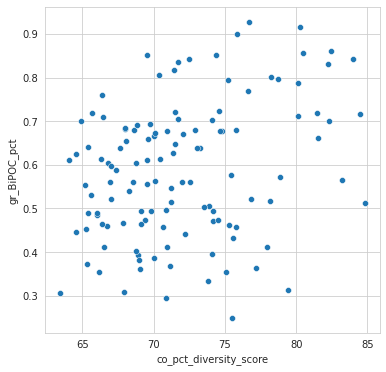

In [675]:
plt.figure(figsize = (6,6))

sns.scatterplot(data = df[df['year'] == 2020],  x = 'co_pct_diversity_score', y = 'gr_BiPOC_pct')

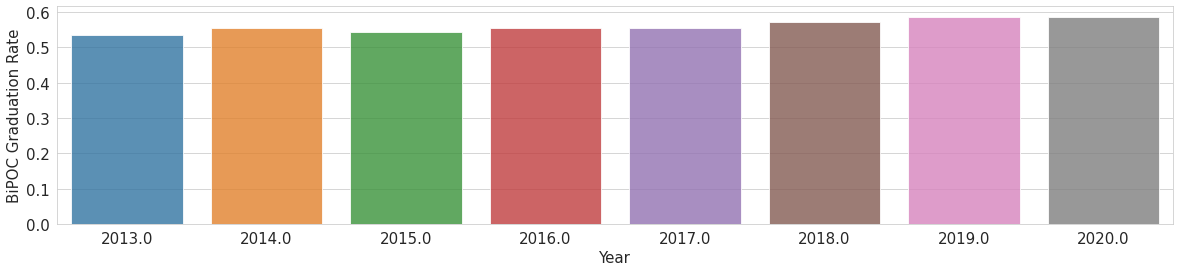

In [676]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'gr_BiPOC_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'gr_BiPOC_pct', alpha = 0.8)

plt.xlabel('Year', fontsize = 15)
plt.ylabel("BiPOC Graduation Rate", fontsize = 15)
plt.tick_params(labelsize = 15);

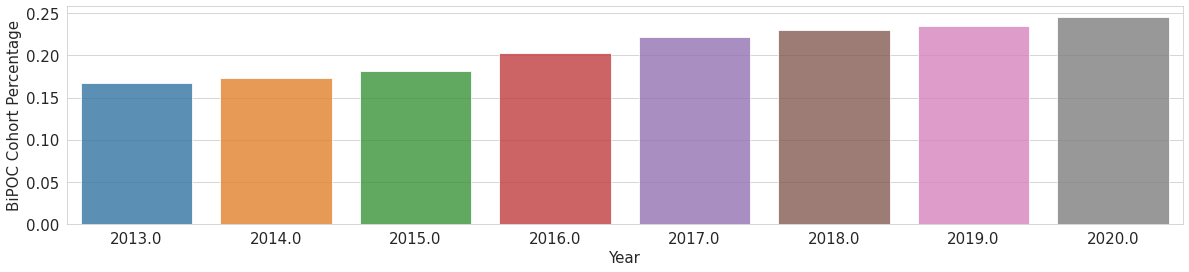

In [677]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'co_BiPOC_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'co_BiPOC_pct', alpha = 0.8)

plt.xlabel('Year', fontsize = 15)
plt.ylabel("BiPOC Cohort Percentage", fontsize = 15)
plt.tick_params(labelsize = 15);

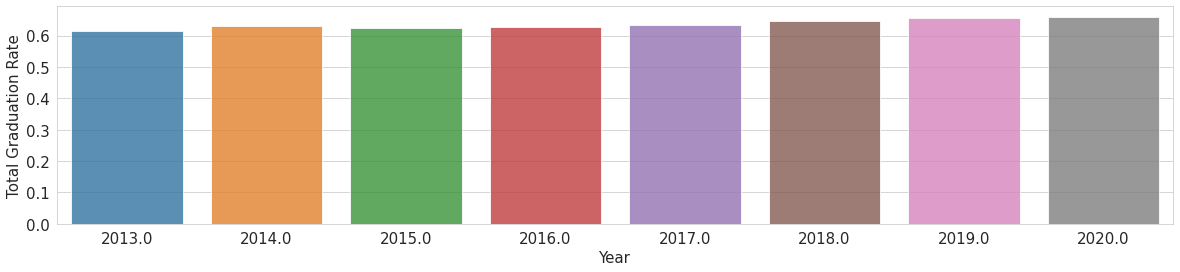

In [678]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'gr_total_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'gr_total_pct', alpha = 0.8)

plt.xlabel('Year', fontsize = 15)
plt.ylabel("Total Graduation Rate", fontsize = 15)
plt.tick_params(labelsize = 15);

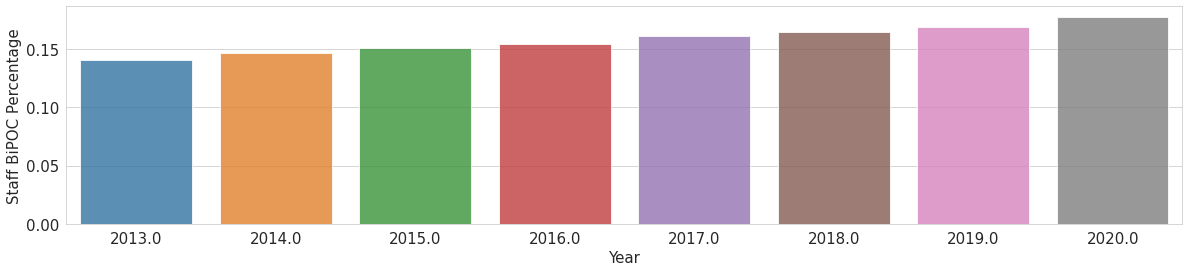

In [679]:
plt.figure(figsize = (20, 4))
df_barplot = df.groupby('year')[['year', 'hr_BiPOC_pct']].mean()
sns.barplot(data = df_barplot, x = 'year', y = 'hr_BiPOC_pct', alpha = 0.8)

plt.xlabel('Year', fontsize = 15)
plt.ylabel("Staff BiPOC Percentage", fontsize = 15)
plt.tick_params(labelsize = 15);

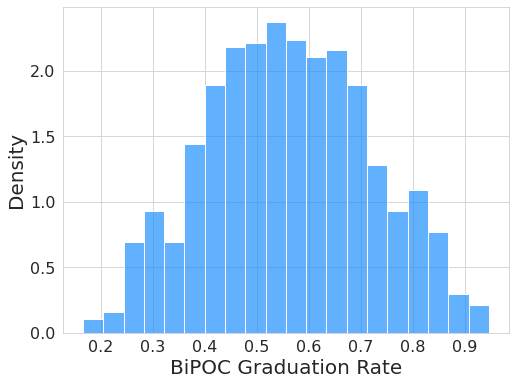

In [680]:
plt.figure(figsize = (8,6))

# Setup histogram plot
sns.histplot(data = df, x = 'gr_BiPOC_pct', bins = 20, color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label x and y axis
plt.xlabel('BiPOC Graduation Rate', fontsize = 20)
plt.ylabel('Density', fontsize = 20)

plt.tick_params(labelsize = 16)

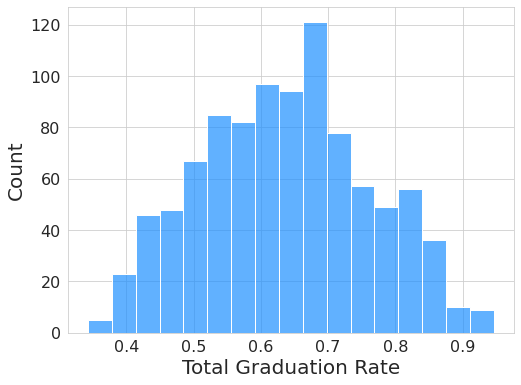

In [681]:
plt.figure(figsize = (8,6))

# Setup histogram plot
sns.histplot(data = df, x = 'gr_total_pct', bins = 17, color = 'dodgerblue', alpha = 0.7)

# Label x and y axis
plt.xlabel('Total Graduation Rate', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(labelsize = 16)

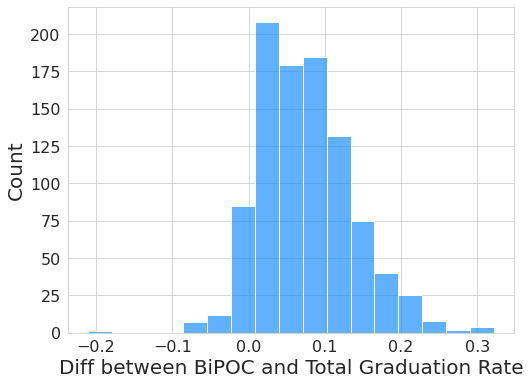

In [682]:
plt.figure(figsize = (8,6))

# Setup histogram plot
sns.histplot(data = df, x = 'gr_BiPOC_diff_pct', bins = 17, color = 'dodgerblue', alpha = 0.7)

# Label x and y axis
plt.xlabel('Diff between BiPOC and Total Graduation Rate', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(labelsize = 16)

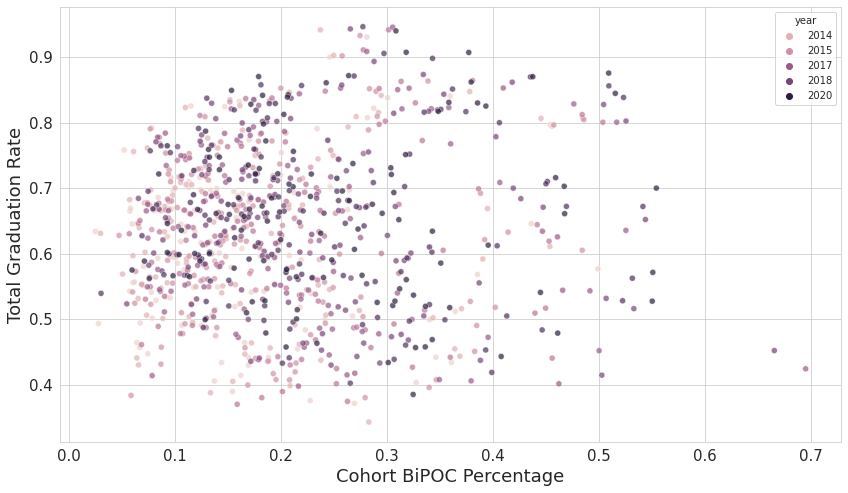

In [685]:
graphPlots('co_BiPOC_pct', 'gr_total_pct', "Cohort BiPOC Percentage", "Total Graduation Rate")

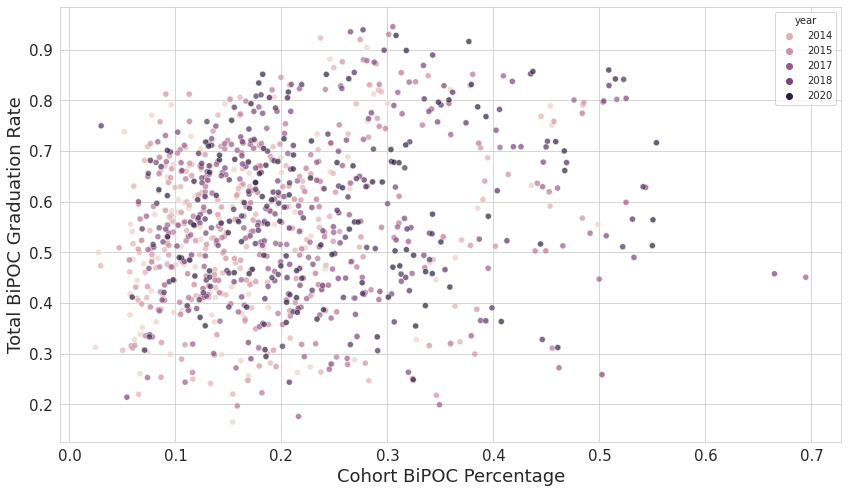

In [686]:
graphPlots('co_BiPOC_pct', 'gr_BiPOC_pct', "Cohort BiPOC Percentage", "Total BiPOC Graduation Rate")

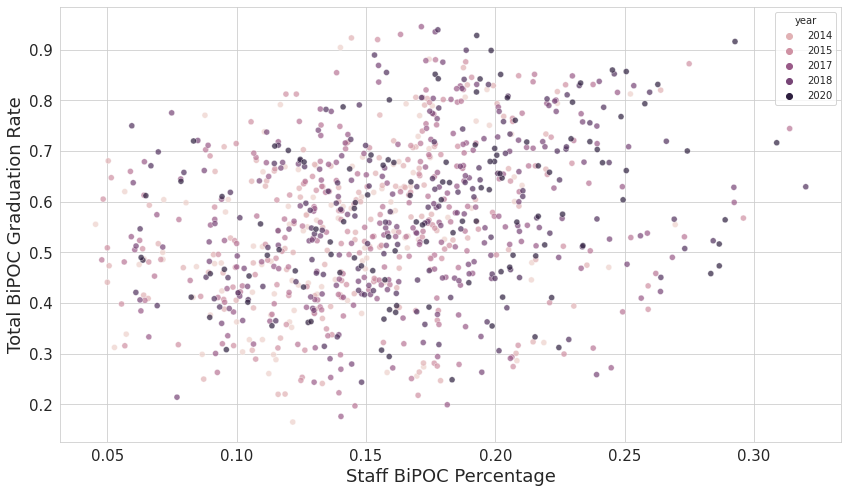

In [688]:
graphPlots('hr_BiPOC_pct', 'gr_BiPOC_pct', "Staff BiPOC Percentage", "Total BiPOC Graduation Rate")

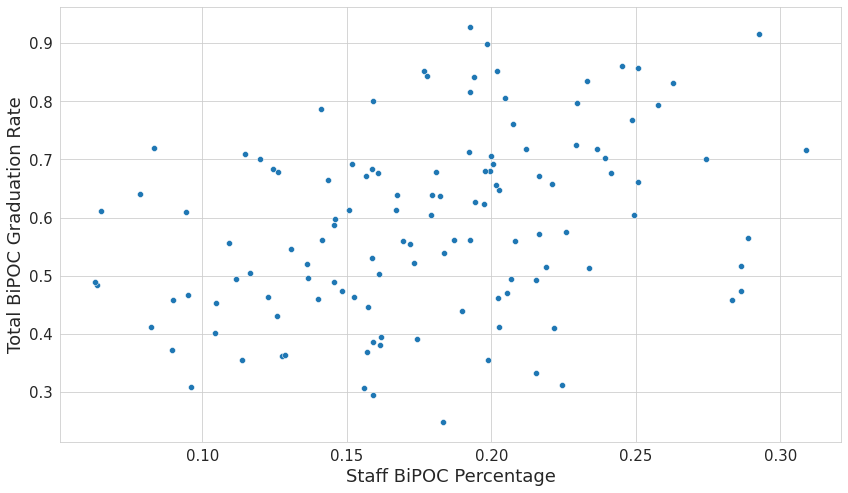

In [689]:
graphPlotsPerYear('hr_BiPOC_pct', 'gr_BiPOC_pct', "Staff BiPOC Percentage", "Total BiPOC Graduation Rate", 2020)

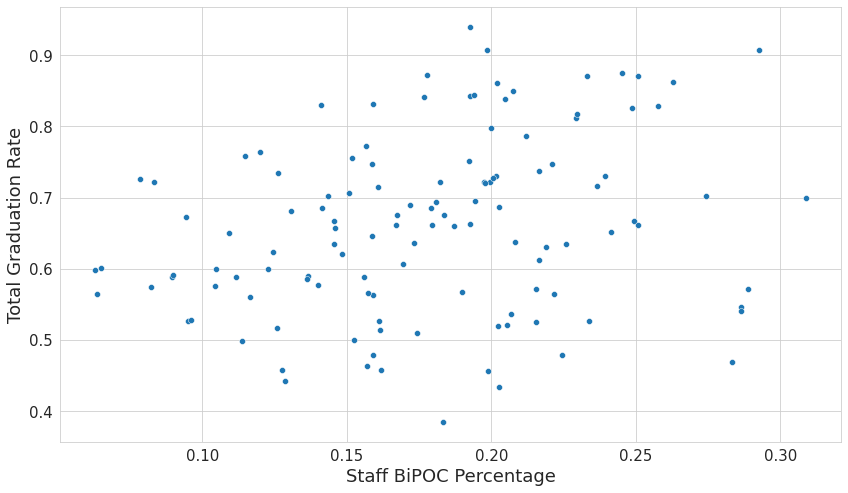

In [690]:
graphPlotsPerYear('hr_BiPOC_pct', 'gr_total_pct', "Staff BiPOC Percentage", "Total Graduation Rate", 2020)

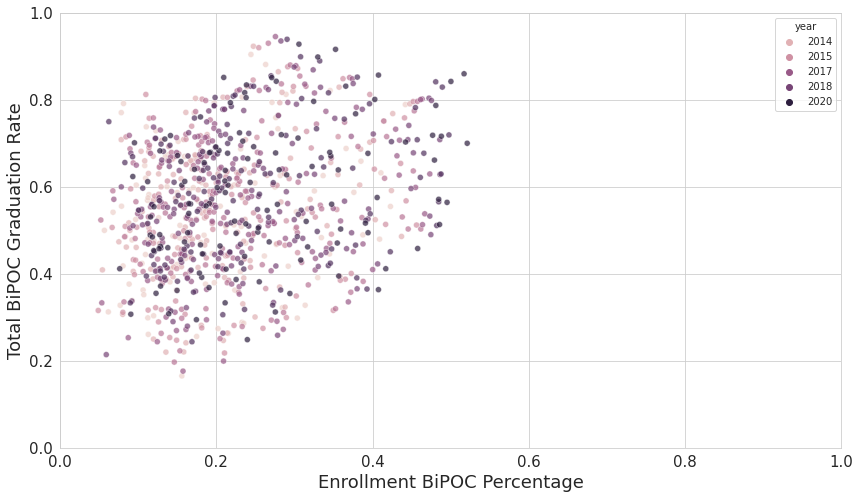

In [691]:
graphPlotsWithLimits('e_BiPOC_pct', 'gr_BiPOC_pct', "Enrollment BiPOC Percentage", "Total BiPOC Graduation Rate")

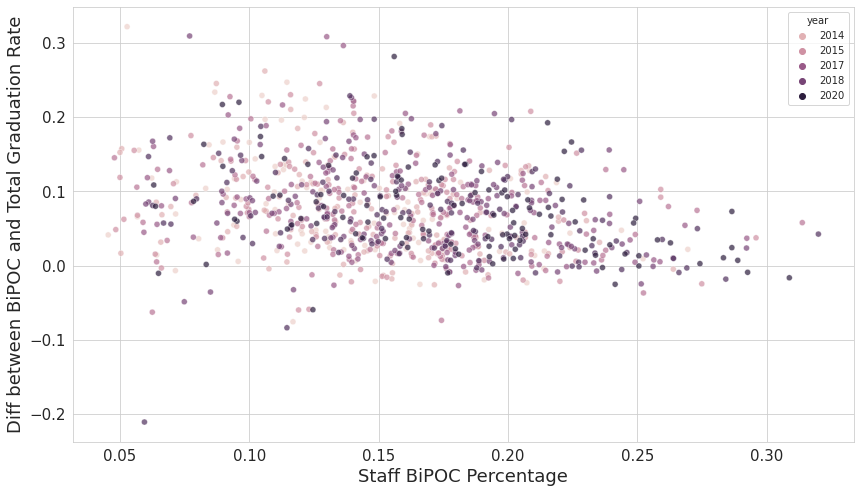

In [692]:
graphPlots('hr_BiPOC_pct', 'gr_BiPOC_diff_pct', "Staff BiPOC Percentage", "Diff between BiPOC and Total Graduation Rate")

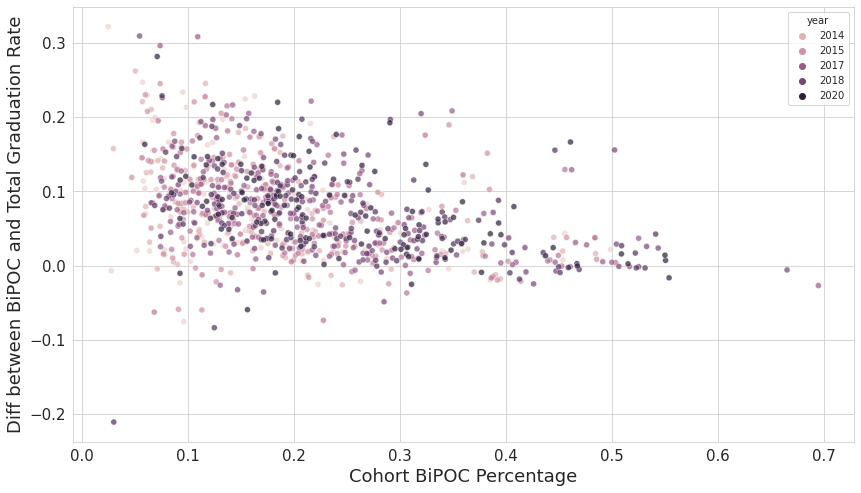

In [734]:
graphPlots('co_BiPOC_pct', 'gr_BiPOC_diff_pct', "Cohort BiPOC Percentage", "Diff between BiPOC and Total Graduation Rate")

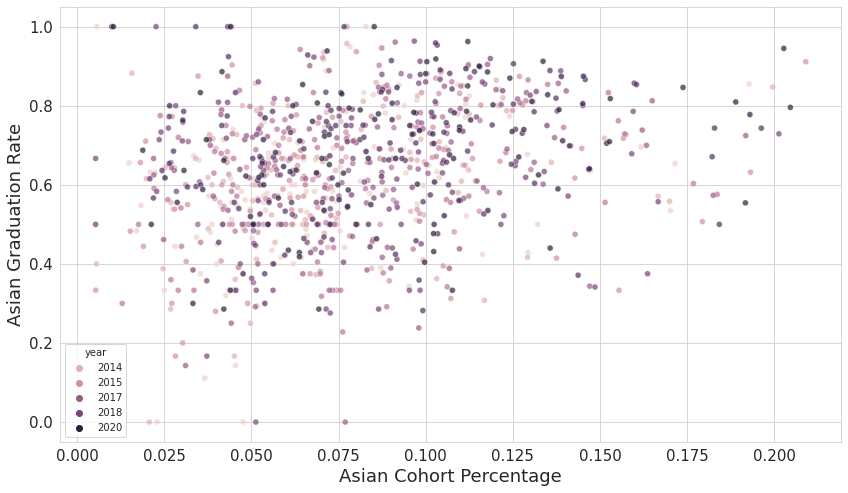

In [693]:
graphPlots('hr_Asian_pct', 'gr_Asian_pct', "Asian Cohort Percentage", "Asian Graduation Rate")

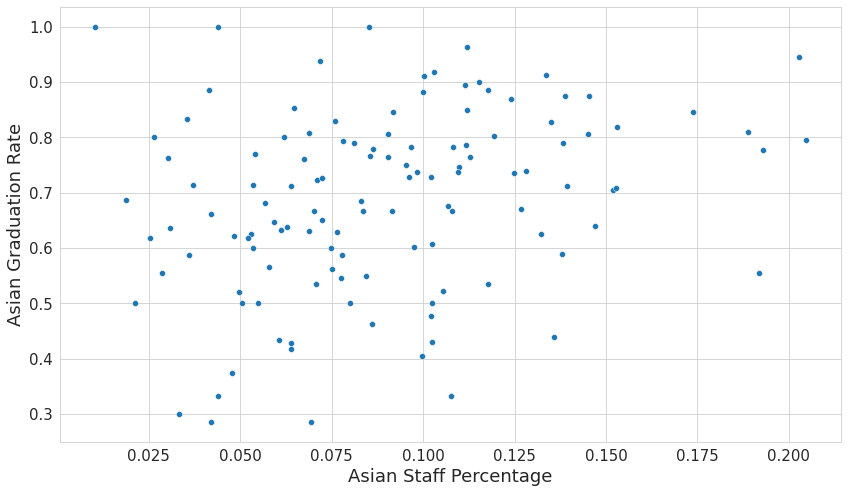

In [694]:
graphPlotsPerYear('hr_Asian_pct', 'gr_Asian_pct', "Asian Staff Percentage", "Asian Graduation Rate", 2020)

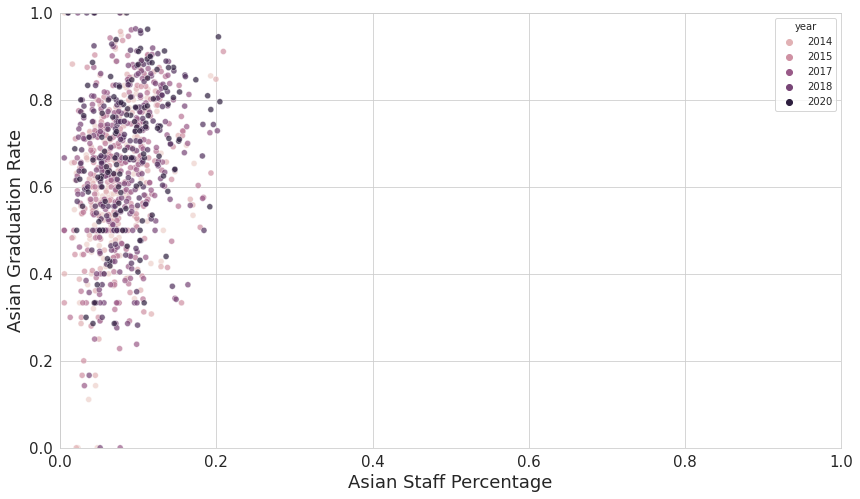

In [695]:
graphPlotsWithLimits('hr_Asian_pct', 'gr_Asian_pct', "Asian Staff Percentage", "Asian Graduation Rate")

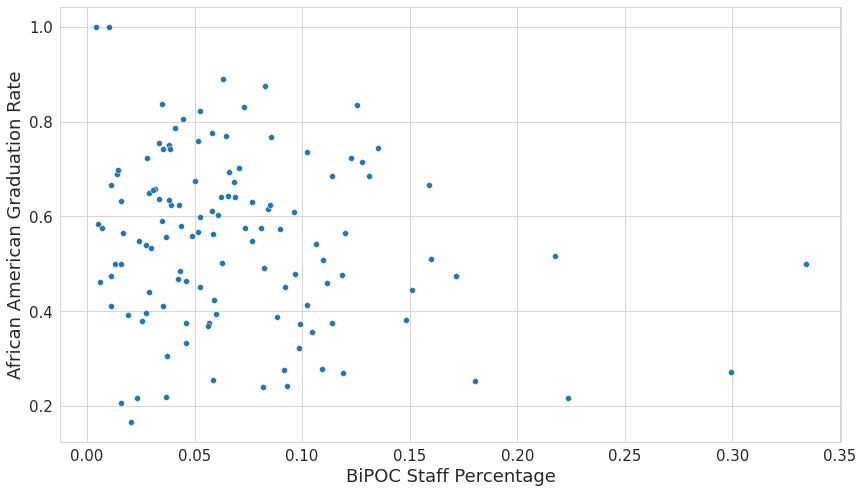

In [696]:
graphPlotsPerYear('co_AfrAmer_pct', 'gr_AfrAmer_pct', "BiPOC Staff Percentage", "African American Graduation Rate", 2020)

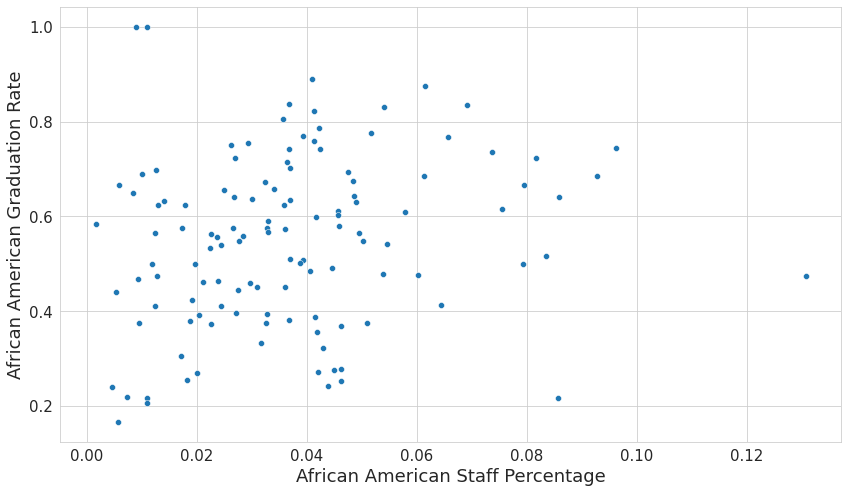

In [697]:
graphPlotsPerYear('hr_AfrAmer_pct', 'gr_AfrAmer_pct', "African American Staff Percentage", "African American Graduation Rate", 2020)

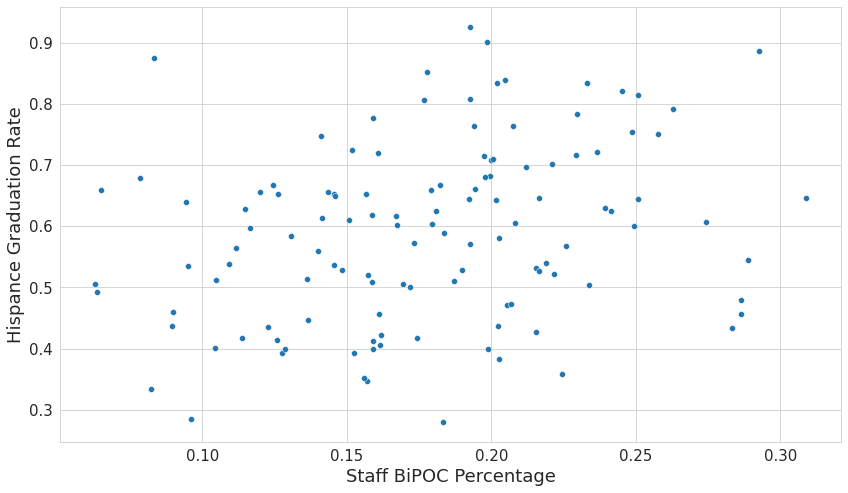

In [698]:
graphPlotsPerYear('hr_BiPOC_pct', 'gr_Hispanic_pct', "Staff BiPOC Percentage", "Hispance Graduation Rate", 2020)

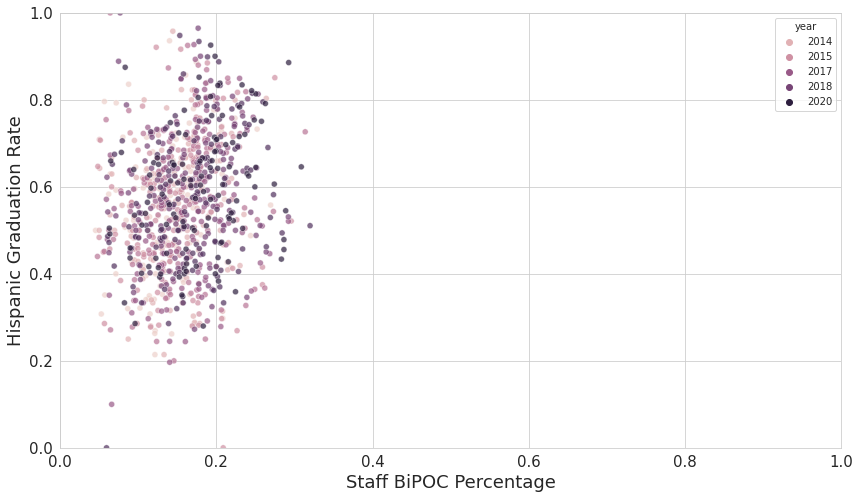

In [699]:
graphPlotsWithLimits('hr_BiPOC_pct', 'gr_Hispanic_pct', "Staff BiPOC Percentage", "Hispanic Graduation Rate")

## Modeling

In [700]:
# plot tree model
import graphviz

# Plot missing values
import missingno as msno

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Train-test splits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Imputation
from sklearn.impute import KNNImputer
#from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [747]:
df_clean = df.dropna()
X = df_clean[['co_BiPOC_pct', 'hr_BiPOC_pct', 'e_BiPOC_pct']]
y = df_clean['gr_BiPOC_pct']

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 1)

In [749]:
df_pred = pd.concat([X_test, y_test], axis = 1)

df_pred.head()

,co_BiPOC_pct,hr_BiPOC_pct,e_BiPOC_pct,gr_BiPOC_pct
5267,0.289375,0.274920,0.304106,0.872396
17084,0.379081,0.262809,0.365705,0.831555
10704,0.085126,0.062977,0.112141,0.384615
17777,0.211382,0.151927,0.247842,0.692308
6839,0.086789,0.156716,0.122347,0.322222


## Linear Regression

In [750]:
model_lr = linear_model.LinearRegression()

In [751]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [752]:
y_pred_lr = model_lr.predict(X_test)

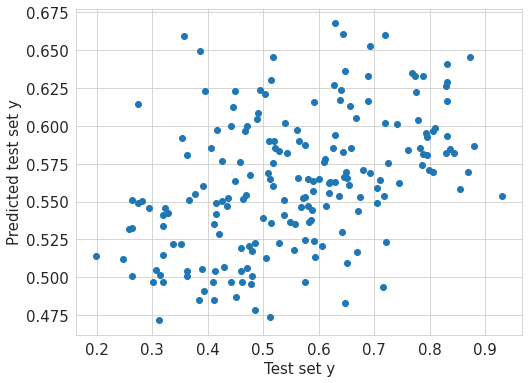

In [753]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_lr, 'o');

plt.xlabel('Test set y', fontsize = 15)
plt.ylabel('Predicted test set y', fontsize = 15)

plt.tick_params(labelsize = 15);

In [754]:
mean_squared_error(y_test, y_pred_lr, squared = False).round(3)

0.149

In [755]:
r_squared = model_lr.score(X, y)
print(r_squared)

0.11265397238862607


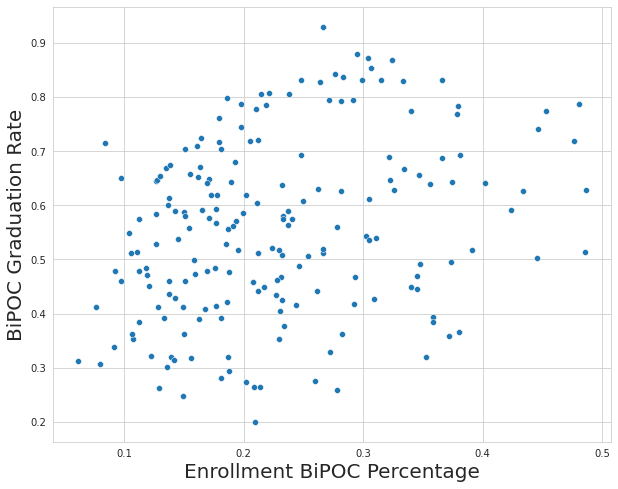

In [756]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'e_BiPOC_pct', y = 'gr_BiPOC_pct')

plt.xlabel('Enrollment BiPOC Percentage',fontsize = 20)
plt.ylabel('BiPOC Graduation Rate', fontsize = 20);

In [757]:
df_pred['gr_BiPOC_pct_lr'] = y_pred_lr

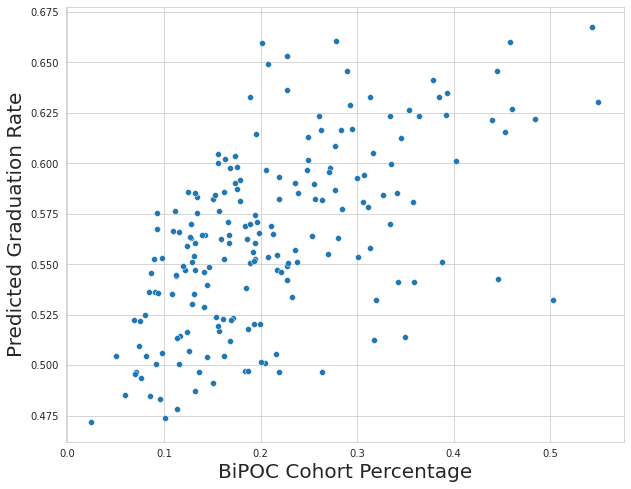

In [758]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'co_BiPOC_pct', y = 'gr_BiPOC_pct_lr')

plt.xlabel('BiPOC Cohort Percentage',fontsize = 20)
plt.ylabel('Predicted Graduation Rate', fontsize = 20);

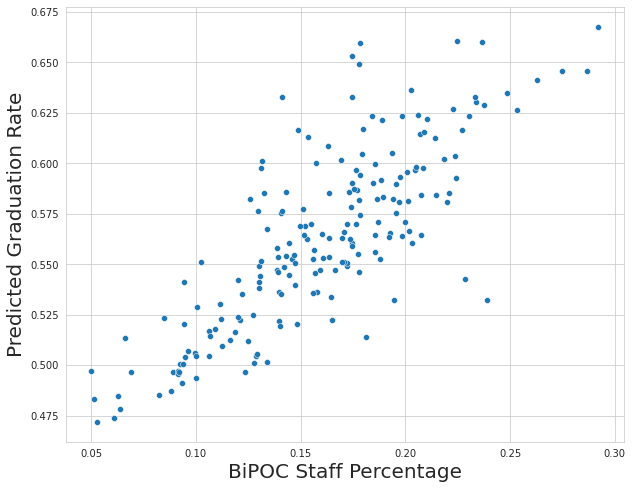

In [759]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'hr_BiPOC_pct', y = 'gr_BiPOC_pct_lr')

plt.xlabel('BiPOC Staff Percentage',fontsize = 20)
plt.ylabel('Predicted Graduation Rate', fontsize = 20);

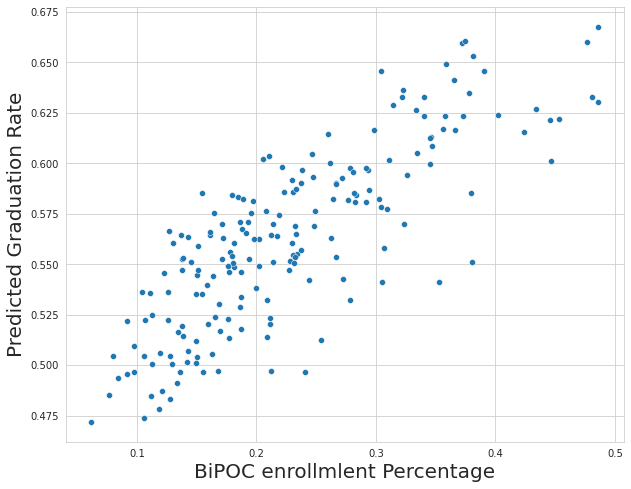

In [760]:
plt.figure(figsize = (10,8))

sns.scatterplot(data = df_pred, x = 'e_BiPOC_pct', y = 'gr_BiPOC_pct_lr')

plt.xlabel('BiPOC enrollmlent Percentage',fontsize = 20)
plt.ylabel('Predicted Graduation Rate', fontsize = 20);

In [769]:
model_lr_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [771]:
print(model_lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           gr_BiPOC_pct   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     28.08
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           3.12e-17
Time:                        02:00:29   Log-Likelihood:                 381.88
No. Observations:                 770   AIC:                            -755.8
Df Residuals:                     766   BIC:                            -737.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4142      0.018     22.983   

## Random Forest

In [761]:
model_rf = RandomForestRegressor(100, min_samples_leaf=5)

In [762]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5)

In [763]:
y_pred_rf = model_rf.predict(X_test)

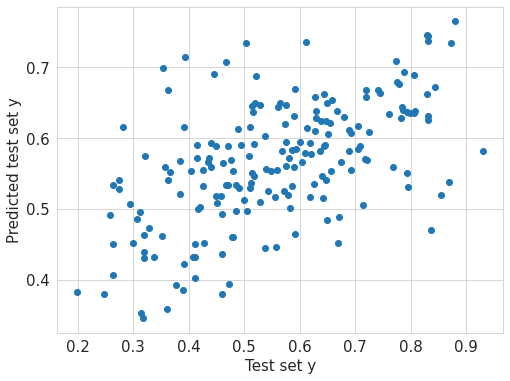

In [764]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_rf, 'o');

plt.xlabel('Test set y', fontsize = 15)
plt.ylabel('Predicted test set y', fontsize = 15)

plt.tick_params(labelsize = 15);

In [765]:
mean_squared_error(y_test, y_pred_rf, squared = False).round(3)

0.134

In [766]:
r_squared = model_rf.score(X, y)
print(r_squared)

0.5594162938545193
